In [94]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import tensorflow as tf
from IPython.core.display_functions import display
from keras.callbacks import History
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers

In [2]:
import os


def get_data_dir():
    data_directory = os.environ["DATA_DIR"]
    print(f"Data directory: {data_directory}")
    return data_directory

In [95]:
def load_dataframe():
    data_directory = get_data_dir()

    df = pd.read_csv(f"{data_directory}/moleculenet/delaney-processed.csv")
    display(df.info())
    display(df.head())
    return df


def show_data_correlation(df: pd.DataFrame):
    sns.pairplot(
        df[
            [
                "ESOL predicted log solubility in mols per litre",
                "Minimum Degree",
                "Molecular Weight",
                "Number of H-Bond Donors",
                "Number of Rings",
                "Number of Rotatable Bonds",
                "Polar Surface Area",
                "measured log solubility in mols per litre",
            ]
        ],
        hue="ESOL predicted log solubility in mols per litre",
        diag_kind="kde",
    )


def plot_loss(history: History):
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.ylim([0, 10])
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_predictions(test_labels: pd.Series, predicted_labels: np.ndarray):
    plt.scatter(test_labels, predicted_labels, label="Predictions")
    plt.xlabel("True values")
    plt.ylabel("Predicted values")
    plt.legend()
    plt.grid(True)
    plt.show()


def split_data(features: pd.Series, labels: pd.Series):
    return train_test_split(features, labels, train_size=0.75, random_state=0)


def train_model(train_features, train_labels) -> tuple[tf.keras.Sequential, History]:
    normalizer = layers.Normalization(
        input_shape=[
            1,
        ],
        axis=None,
    )
    normalizer.adapt(np.array(train_features))

    model = tf.keras.Sequential([normalizer, layers.Dense(units=1)])
    display(model.summary())

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss=tf.keras.losses.MeanSquaredError())

    history = model.fit(train_features, train_labels, epochs=100, verbose=0, validation_split=0.2)
    return model, history

2.16.2
1.7.1
Data directory: /Users/Artsem_Nikitsenka/projects/dev-practice/data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 10 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Compound ID                                      1128 non-null   object 
 1   ESOL predicted log solubility in mols per litre  1128 non-null   float64
 2   Minimum Degree                                   1128 non-null   int64  
 3   Molecular Weight                                 1128 non-null   float64
 4   Number of H-Bond Donors                          1128 non-null   int64  
 5   Number of Rings                                  1128 non-null   int64  
 6   Number of Rotatable Bonds                        1128 non-null   int64  
 7   Polar Surface Area                               1128 non-null   float64
 8   measured log solubility in 

None

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


0    457.432
1    201.225
2    152.237
3    278.354
4     84.143
Name: Molecular Weight, dtype: float64

count    846.000000
mean     201.554414
std      101.369536
min       16.043000
25%      121.183000
50%      180.156000
75%      268.320000
max      780.949000
Name: Molecular Weight, dtype: float64

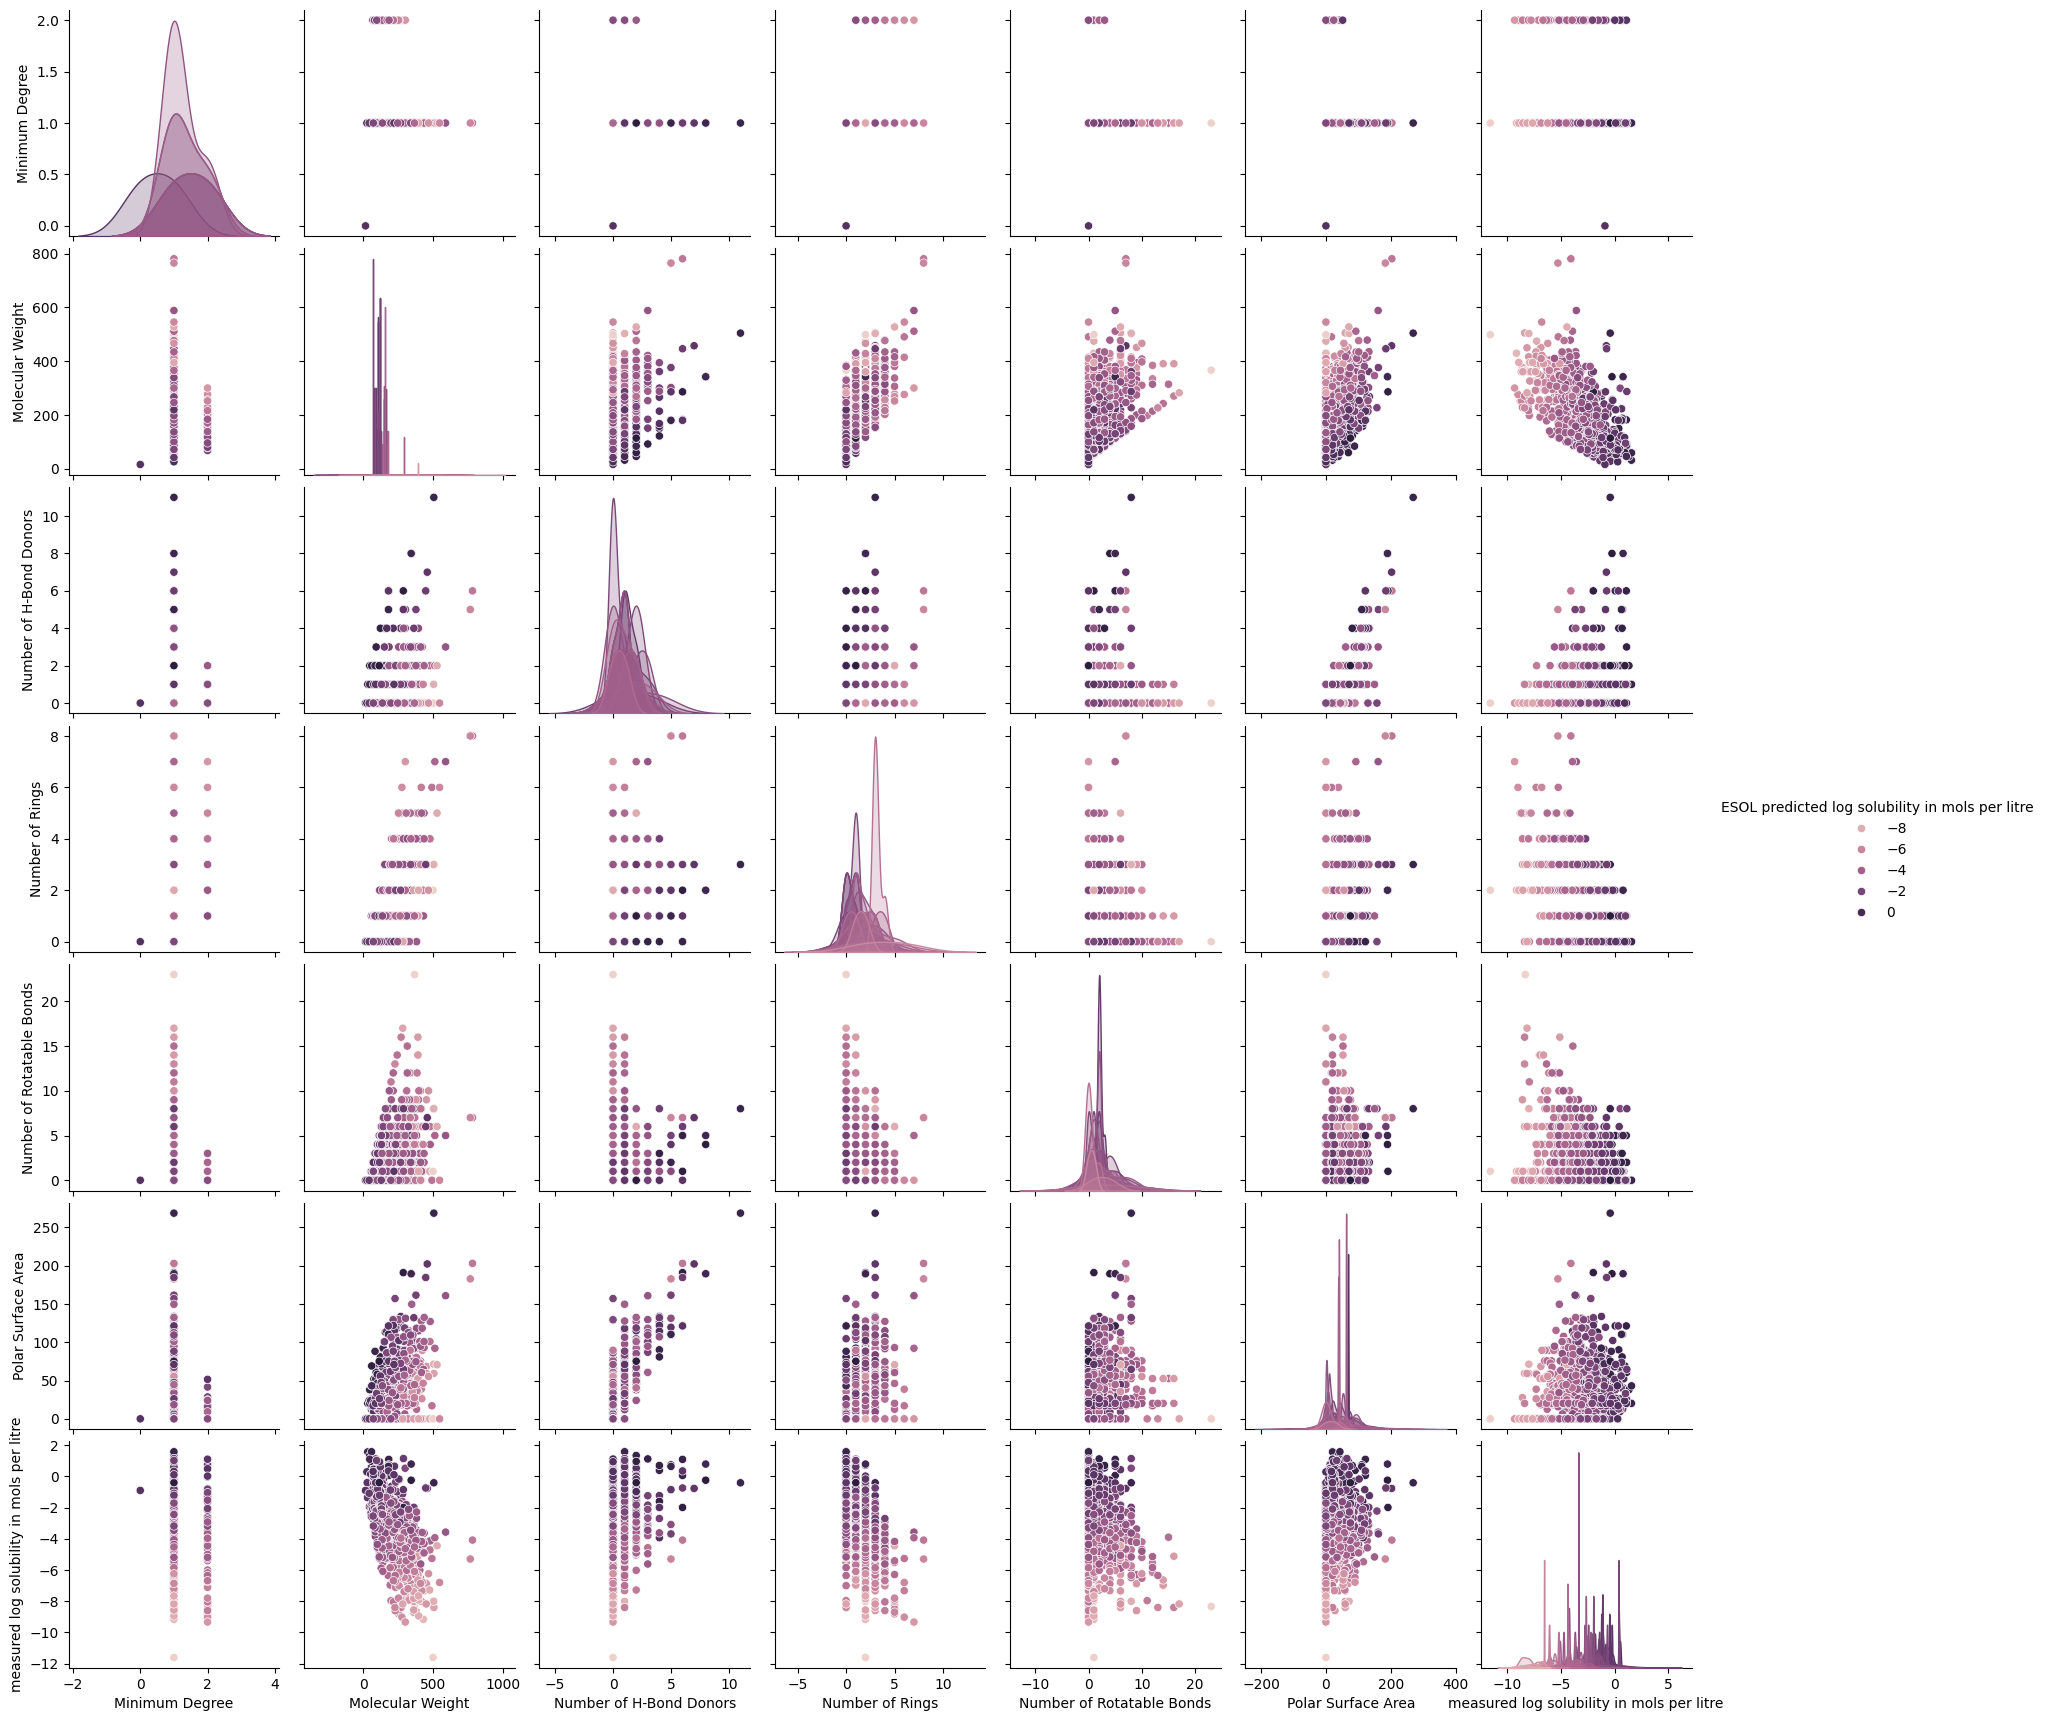

In [96]:
print(tf.__version__)
print(sklearn.__version__)

tf.random.set_seed(22)

matplotlib.rcParams["figure.figsize"] = [9, 6]

df = load_dataframe()
show_data_correlation(df)

features = df["Molecular Weight"]
display(features.head())
labels = df["ESOL predicted log solubility in mols per litre"]

train_features, test_features, train_labels, test_labels = split_data(features, labels)
display(train_features.describe())

/Users/Artsem_Nikitsenka/projects/dev-practice/.venv/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_21                │ (None, 1)              │             3 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 3 (16.00 B)

None

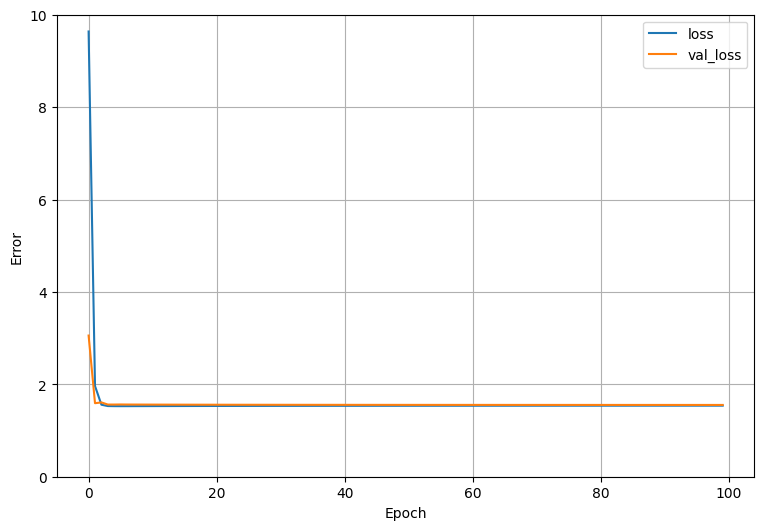

In [97]:
model, history = train_model(train_features, train_labels)
plot_loss(history)

Test loss: 1.5125789642333984
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


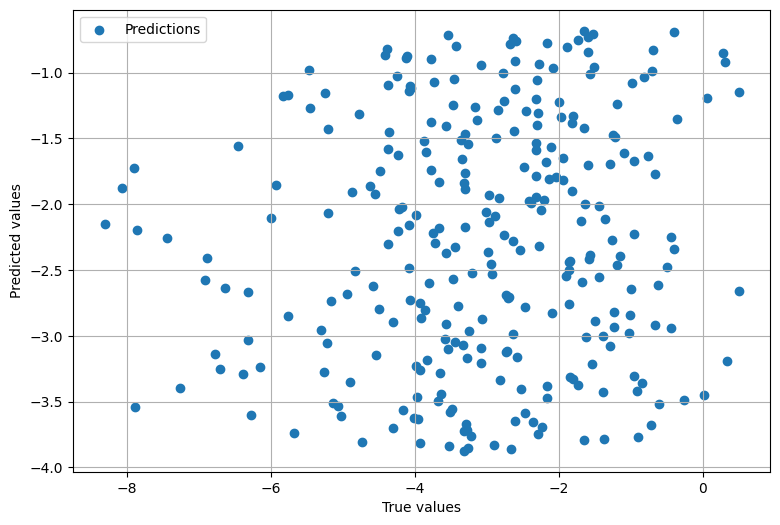

In [98]:
test_loss: float = model.evaluate(test_features, test_labels, verbose=0)
print(f"Test loss: {test_loss}")

molecular_weights: tf.Tensor = tf.linspace(0.0, 282, 282)
predicted_solubility: np.ndarray = model.predict(molecular_weights)
plot_predictions(test_labels, predicted_solubility)